In [1]:
import pandas as pd
import numpy as np
import random as rnd
from scipy.io.arff import loadarff

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 5)

from sklearn.ensemble import BaggingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix, f1_score

# model evaluation calculate and score
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score,  mean_squared_error

# plot metrics model answer(metrics)
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

# model evaluation 
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import LabelBinarizer


from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
#import umap

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm

# import some dependencies to plot

from plotly.offline import iplot
# init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split, KFold, cross_val_score

# machine learning model
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
# boosting
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.feature_selection import SelectFromModel

# Import for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [2]:
raw_data = loadarff('data/cleaned/pc4.arff')
df_data = pd.DataFrame(raw_data[0])
df_data

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,22.0,15.0,9.0,4.0,11.0,26.0,8.0,0.22,12.0,2.17,...,29.0,0.11,42.0,78.0,23.0,16.0,71.0,31.91,36.0,b'Y'
1,7.0,1.0,2.0,0.0,2.0,0.0,1.0,0.14,0.0,0.00,...,4.0,0.06,8.0,30.0,4.0,10.0,18.0,22.22,7.0,b'N'
2,10.0,3.0,2.0,0.0,2.0,4.0,2.0,0.20,2.0,2.00,...,9.0,0.08,12.0,25.0,8.0,12.0,24.0,16.67,10.0,b'N'
3,9.0,3.0,2.0,0.0,6.0,4.0,2.0,0.20,2.0,2.00,...,9.0,0.07,12.0,26.0,8.0,12.0,27.0,37.50,10.0,b'N'
4,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.25,0.0,0.00,...,2.0,0.10,4.0,8.0,3.0,7.0,10.0,0.00,4.0,b'N'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,0.0,3.0,0.0,0.0,0.0,4.0,2.0,0.29,2.0,2.00,...,7.0,0.22,17.0,23.0,5.0,7.0,9.0,0.00,7.0,b'N'
1375,0.0,3.0,0.0,0.0,0.0,4.0,2.0,0.33,2.0,2.00,...,7.0,0.25,13.0,17.0,5.0,7.0,8.0,0.00,6.0,b'N'
1376,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.07,0.0,0.00,...,3.0,0.06,29.0,76.0,3.0,8.0,17.0,0.00,15.0,b'N'
1377,1.0,3.0,1.0,0.0,0.0,4.0,2.0,0.40,2.0,2.00,...,7.0,0.25,10.0,14.0,6.0,10.0,8.0,0.00,5.0,b'N'


In [3]:
df_data.info() #informs about the data (memory usage, data types etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   LOC_BLANK                        1379 non-null   float64
 1   BRANCH_COUNT                     1379 non-null   float64
 2   CALL_PAIRS                       1379 non-null   float64
 3   LOC_CODE_AND_COMMENT             1379 non-null   float64
 4   LOC_COMMENTS                     1379 non-null   float64
 5   CONDITION_COUNT                  1379 non-null   float64
 6   CYCLOMATIC_COMPLEXITY            1379 non-null   float64
 7   CYCLOMATIC_DENSITY               1379 non-null   float64
 8   DECISION_COUNT                   1379 non-null   float64
 9   DECISION_DENSITY                 1379 non-null   float64
 10  DESIGN_COMPLEXITY                1379 non-null   float64
 11  DESIGN_DENSITY                   1379 non-null   float64
 12  EDGE_COUNT          

In [4]:
df_data.describe() #shows simple statistics (min, max, mean, etc.)

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL
count,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,...,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000
mean,7.357505,7.856418,2.327049,2.226251,5.110950,7.253082,4.538071,0.287716,3.299492,1.060167,...,3.672951,15.161711,0.181639,40.004351,64.155185,13.627991,12.243655,37.718637,18.405279,21.488035
std,9.974887,10.452032,2.853651,5.443696,9.662146,13.027232,5.483896,0.201082,5.780661,1.129120,...,6.856052,18.957498,0.177228,72.352738,101.420652,20.847643,6.263223,45.795602,21.352172,25.394029
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.150000,0.000000,0.000000,...,0.000000,5.000000,0.080000,9.000000,16.000000,6.000000,8.000000,12.000000,0.000000,7.000000
50%,4.000000,5.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.240000,0.000000,0.000000,...,0.000000,10.000000,0.130000,20.000000,35.000000,9.000000,11.000000,21.000000,10.870000,12.000000
75%,10.000000,9.000000,3.000000,2.000000,6.000000,8.000000,5.000000,0.380000,4.000000,2.000000,...,4.000000,18.000000,0.220000,45.000000,76.000000,17.000000,16.000000,48.000000,31.860000,27.000000
max,90.000000,143.000000,24.000000,68.000000,78.000000,118.000000,73.000000,1.000000,50.000000,5.000000,...,84.000000,286.000000,1.000000,1403.000000,1687.000000,601.000000,38.000000,627.000000,93.020000,210.000000


In [5]:
# trasform to binary and extract target dont run twice
df_data['Defective'] = df_data['Defective'].apply(lambda x: 1 if x == b'Y' else 0)
df_data.groupby("Defective").size()

Defective
0    1201
1     178
dtype: int64

In [56]:
# metric correlations- (step 1)

In [6]:
X_train_size_features = df_data[['LOC_BLANK','PERCENT_COMMENTS','PARAMETER_COUNT']]
X_train_complexity_features = df_data[['CONDITION_COUNT','CYCLOMATIC_DENSITY','DESIGN_COMPLEXITY','DESIGN_DENSITY','ESSENTIAL_COMPLEXITY','NUM_OPERATORS','HALSTEAD_LEVEL']]

In [7]:
df_data.shape

(1379, 38)

In [199]:
# Variance inflation factor analysis  (VIF) - setp 2

In [8]:
def vif(features):

    # Prepare a dataframe for VIF
    X_VIF = add_constant(features)

    # Simulate a multicollinearity situation of AddedLOC, A, and B
    #X_VIF['A'] = [2 * x_i + random.random() for x_i in X_VIF['AddedLOC']]
    #X_VIF['B'] = [3 * x_i + random.random() for x_i in X_VIF['AddedLOC']]

    # Calculate VIF scores
    vif_scores = pd.DataFrame([variance_inflation_factor(X_VIF.values, i) 
                   for i in range(X_VIF.shape[1])], 
                  index=X_VIF.columns)
    # Prepare a final dataframe of VIF scores
    vif_scores.reset_index(inplace = True)
    vif_scores.columns = ['Feature', 'VIFscore']
    vif_scores = vif_scores.loc[vif_scores['Feature'] != 'const', :]
    vif_scores = vif_scores.sort_values(by = ['VIFscore'], ascending = False)
    return vif_scores

In [9]:
X = df_data.iloc[:, 0:-1]
y = df_data["Defective"]

#y = df_data.pop('Defective')
#X = df_data

print("X:", X.shape)
print("y:", y.shape)

X: (1379, 37)
y: (1379,)


In [10]:
vif(X_train_size_features)

,Feature,VIFscore
1,LOC_BLANK,1.334684
2,PERCENT_COMMENTS,1.332763
3,PARAMETER_COUNT,1.002430


In [12]:
vif(X_train_complexity_features)

,Feature,VIFscore
3,DESIGN_COMPLEXITY,1.975442
5,ESSENTIAL_COMPLEXITY,1.938543
6,NUM_OPERATORS,1.492236
4,DESIGN_DENSITY,1.475486
1,CONDITION_COUNT,1.469822
7,HALSTEAD_LEVEL,1.347947
2,CYCLOMATIC_DENSITY,1.113948


In [14]:
#featres after step1 & step 2

In [13]:
X_train_all_features = df_data[['LOC_BLANK','PERCENT_COMMENTS','PARAMETER_COUNT','CONDITION_COUNT','CYCLOMATIC_DENSITY','DESIGN_COMPLEXITY','DESIGN_DENSITY','ESSENTIAL_COMPLEXITY','NUM_OPERATORS','HALSTEAD_LEVEL']]

In [ ]:
#resampling

Classes: [0, 1]
Counts: [1201, 178]


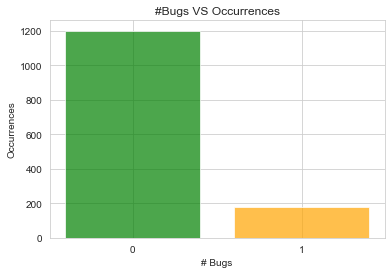

In [14]:
unique, counts = np.unique(y, return_counts=True)
print("Classes:", unique.tolist())
print("Counts:", counts.tolist())

plt.bar(unique, counts, color=['g', 'orange', 'r'], alpha=0.7)
plt.title("#Bugs VS Occurrences")
plt.xticks(range(len(unique)))
plt.ylabel("Occurrences")
plt.xlabel("# Bugs");

In [17]:
#oversampling using SMOTE up to 30%

In [15]:
from imblearn.over_sampling import SMOTE
X_train_over_sampled, y_train_over_sampled = SMOTE(sampling_strategy=0.3).fit_resample(X_train_all_features, y)
print("Train:", X_train_over_sampled.shape, y_train_over_sampled.shape)

Train: (1561, 10) (1561,)


Classes: [0, 1]
Counts: [1201, 360]


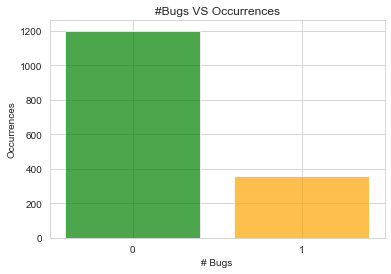

In [16]:
unique, counts = np.unique(y_train_over_sampled, return_counts=True)
print("Classes:", unique.tolist())
print("Counts:", counts.tolist())

plt.bar(unique, counts, color=['g', 'orange', 'r'], alpha=0.7)
plt.title("#Bugs VS Occurrences")
plt.xticks(range(len(unique)))
plt.ylabel("Occurrences")
plt.xlabel("# Bugs");

In [17]:
bugs= y_train_over_sampled.groupby(y_train_over_sampled)
bugs.size()

Defective
0    1201
1     360
Name: Defective, dtype: int64

In [18]:
data = pd.concat([X_train_over_sampled, y_train_over_sampled], axis=1)

In [19]:
data

,LOC_BLANK,PERCENT_COMMENTS,PARAMETER_COUNT,CONDITION_COUNT,CYCLOMATIC_DENSITY,DESIGN_COMPLEXITY,DESIGN_DENSITY,ESSENTIAL_COMPLEXITY,NUM_OPERATORS,HALSTEAD_LEVEL,Defective
0,22.000000,31.910000,0.000000,26.000000,0.220000,5.000000,0.630000,1.000000,78.000000,0.070000,1
1,7.000000,22.220000,0.000000,0.000000,0.140000,1.000000,1.000000,1.000000,30.000000,0.100000,0
2,10.000000,16.670000,0.000000,4.000000,0.200000,2.000000,1.000000,1.000000,25.000000,0.110000,0
3,9.000000,37.500000,0.000000,4.000000,0.200000,2.000000,1.000000,1.000000,26.000000,0.110000,0
4,3.000000,0.000000,0.000000,0.000000,0.250000,1.000000,1.000000,1.000000,8.000000,0.210000,0
...,...,...,...,...,...,...,...,...,...,...,...
1556,18.192228,17.399452,0.931606,23.837307,0.108503,3.863213,0.590813,3.329016,607.628991,0.024658,1
1557,7.983076,26.707495,0.000000,23.355899,0.223728,2.338975,0.257287,4.966151,87.271277,0.030000,1
1558,4.306986,9.933355,1.000000,4.000000,0.141163,1.423253,0.711627,1.000000,38.153493,0.108465,1
1559,5.073539,31.747761,0.073539,11.705844,0.171471,1.073539,0.280886,1.000000,34.558766,0.071471,1


In [20]:
# save the dataset for c5
filename = 'pc4.csv'
data.to_csv('data/cleaned/expr2/{}'.format(filename),sep=',')

In [116]:
# Model construction

In [16]:
validation_size = 0.3
random_seed=7

from sklearn.model_selection import train_test_split
X_train_over_sampled, X_test_over_sampled, y_train_over_sampled, y_test_over_sampled = train_test_split(X_train_over_sampled, y_train_over_sampled, test_size=0.3,random_state=7)
X_cv_over_sampled, X_test_over_sampled, y_cv_over_sampled, y_test_over_sampled = train_test_split(X_test_over_sampled, y_test_over_sampled, test_size=0.5)
print("Train:", X_train_over_sampled.shape, y_train_over_sampled.shape,
      "Test:", X_test_over_sampled.shape, y_test_over_sampled.shape,
      "Cross Validation", X_cv_over_sampled.shape, y_cv_over_sampled.shape)


Train: (1092, 10) (1092,) Test: (235, 10) (235,) Cross Validation (234, 10) (234,)


In [18]:
def Modeler(model, X_train, y_train, X_cv, y_cv, params, scale=False, n_jobs=True, pca=False):
    
    if scale & pca:
        pipeline = Pipeline([
            ('scale', StandardScaler()),
            ('dim_reduct', PCA(n_components=4)),
            ('clf', model())])
        print("Scaling and dim reduct...")
        
    elif scale:
        pipeline = Pipeline([ ('scale', StandardScaler()), ('clf', model())])
        
    elif pca:
        pipeline = Pipeline([
        ('dim_reduct', PCA(n_components=pca)),
        ('clf', model())])
    else:
        pipeline = Pipeline([('clf', model())])
        
    grid = GridSearchCV(pipeline, param_grid = params, cv=5, n_jobs=4, refit=True)
    grid.fit(X_cv, y_cv)
    
    best_prameters = {}
    for k, v in grid.best_params_.items():
        best_prameters[k[5:]] = v

    if n_jobs:
        model = model(**best_prameters, n_jobs=4)
    else:
        model = model(**best_prameters)
   
    model.fit(X_train, y_train)
    
    print("Best Parameters for model:", best_prameters)

    return {
        "model": model, 
        "best_params":best_prameters
    }

In [19]:
# metrics method
def metrics_calculate(model_name, y_val, y_pred):
    '''
    0. basic metrics values ['accuracy', 'precision', 'recall', 'fpr', 'fnr', 'auc']
    1. classification report
    2. confusion matrix
    '''
    y_val = np.reshape(y_val, -1).astype(np.int32)
    y_pred = np.where(np.reshape(y_pred, -1) > 0.5, 1, 0)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred,labels=[0,1]).ravel()
    fpr = fp / (tn + fp)
    fnr = fn / (tp + fn)
    auc = roc_auc_score(y_val, y_pred)
    print('Model:%s Acc:%.8f Prec:%.8f Recall:%.8f FNR:%.8f FPR:%.8f AUC:%.8f' % (model_name, accuracy, precision, recall, fnr, fpr, auc))
    print(model_name, 'classification report:\n', classification_report(y_val, y_pred))
    print(model_name, 'confusion_matrix:\n', confusion_matrix(y_val, y_pred))
    print('\n%s FNR:%.8f FPR:%.8f\n%s accuracy:%.8f' % (model_name, fnr, fpr, model_name, accuracy_score(y_pred,y_val)))

In [20]:
def model_eval(model, X_test, y_test, acc=True, recall_=True, auc_=True, plot_conf=True, plot_auc=True, f1=True, prop=False):
    
    res = [None, None, None, None] # Accuracy, auc_roc, f1_score, recall
    y_pred = model.predict(X_test)
    
    if prop:
        y_pred = np.where(y_pred > 0.5, 1, 0)
    
    if f1:
        f_sc = f1_score(y_test, y_pred, average='macro')
        res[2] = f_sc
        
    if acc:
        res[0] = accuracy_score(y_test, y_pred)
        print('accuracy:', res[0] * 100 ,'%')
              
    if recall_:
        res[3]= recall_score(y_test, y_pred, average='macro')
        print('recall:', res[3] * 100 ,'%')
              
    if auc_:
        lb = LabelBinarizer()
        lb.fit(y_test)

        truth = lb.transform(y_test)
        y_pred_encode = lb.transform(y_pred)
              
        res[1] = roc_auc_score(truth, y_pred_encode, average = 'macro')
        print('ROC:', res[1] * 100 ,'%')
              
    if plot_conf:
        fig, ax = plt.subplots(figsize=(10,6))

        conf = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
        sns.heatmap(conf, cmap= 'Set1', annot=True, cbar=False)
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.title('Confusion Matrix');
    
    if plot_auc:
        fig, ax = plt.subplots(figsize=(10,6))

        if not auc_:
            lb = LabelBinarizer()
            lb.fit(y_test)

            truth = lb.transform(y_test)
            y_pred_encode = lb.transform(y_pred)

        fpr = [None, None, None]
        tpr = [None, None, None]
        auc_of_roc = [None, None, None]
        
        #n_classes = (0, 1)
        
        for i in range(0,1):
            fpr[i], tpr[i], _ = roc_curve(truth[:, i], y_pred_encode[:, i])
            auc_of_roc[i] = auc(fpr[i], tpr[i])
            
        plt.plot(fpr[0], tpr[0], label='0 - area under ROC = %0.3f' % auc_of_roc[0])

        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title("ROC AUC");
        plt.legend()

    return res

In [22]:
scores = {}

In [85]:
# classifiers after removing multi columnary and over sampling

In [23]:
# AdaBoostClassifier
ada_params = {
    'clf__learning_rate': [0.1, 0.5, 1.0],
    'clf__n_estimators': [100, 200]
}

ada = Modeler(AdaBoostClassifier, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled, ada_params, scale=False, n_jobs=False)

Best Parameters for model: {'learning_rate': 1.0, 'n_estimators': 200}


accuracy: 91.06382978723404 %
recall: 84.84042553191489 %
ROC: 84.8404255319149 %


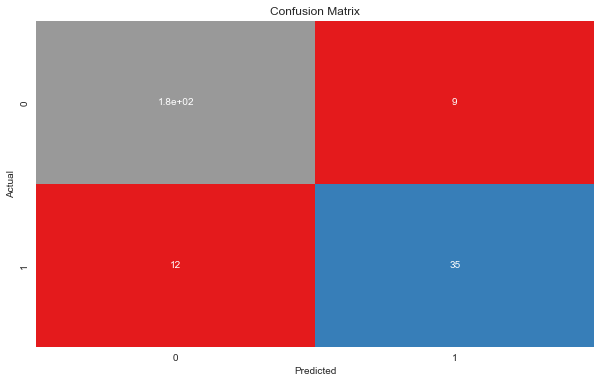

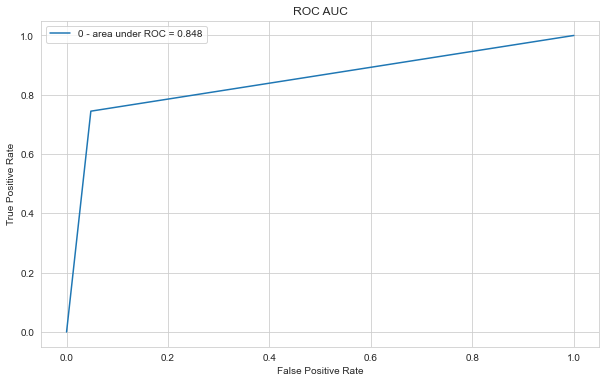

In [24]:
model_scoring = model_eval(ada["model"], X_test_over_sampled, y_test_over_sampled)
scores["AdaBoost Classifier | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                             "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

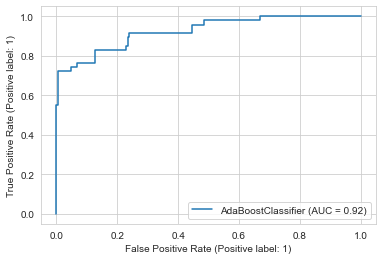

In [25]:
ROC_curve = plot_roc_curve(ada["model"], X_test_over_sampled, y_test_over_sampled)
scores["AdaBoost Classifier | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [127]:
#xgboost

In [26]:
xg_params = {
    'clf__max_depth': [8, 9],
    'clf__learning_rate': [0.1],
    'clf__n_estimators':[200],
    'clf__reg_alpha':[1.1],
    'clf__colsample_bytree':[0.8],
    'clf__subsample':[0.8, 0.9,],
}

xgboost = Modeler(XGBClassifier, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled, xg_params, scale=False, n_jobs=5)

[11:41:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:41:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Parameters for model: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'reg_alpha': 1.1, 'subsample': 0.8}


accuracy: 94.8936170212766 %
recall: 92.02127659574468 %
ROC: 92.02127659574468 %


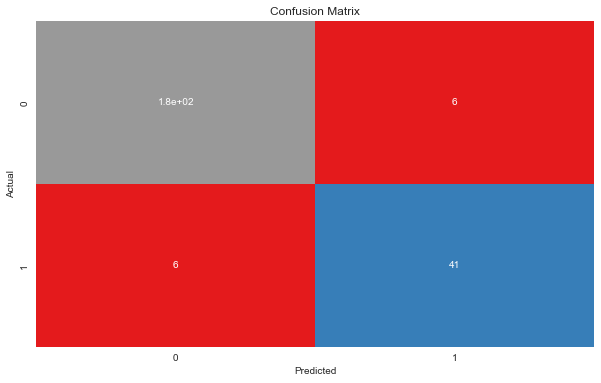

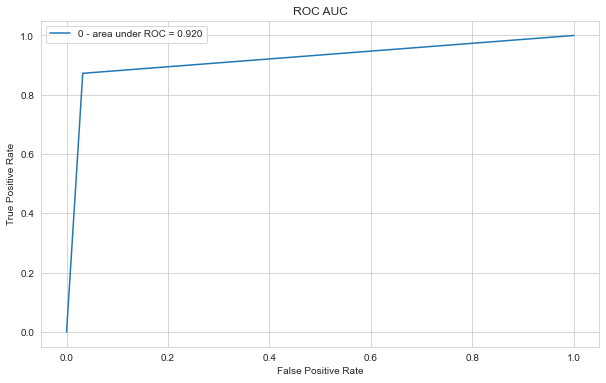

In [27]:
model_scoring = model_eval(xgboost["model"], X_test_over_sampled, y_test_over_sampled)
scores["XGBoost | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                              "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                              "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                              "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}


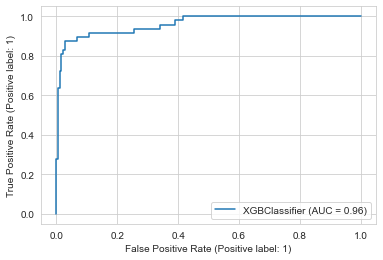

In [28]:
ROC_curve = plot_roc_curve(xgboost["model"], X_test_over_sampled, y_test_over_sampled)
scores["XGBoost | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [ ]:
# Random Forest

In [29]:
rfc_params = {
    'clf__n_estimators'      : [200, 500],
    'clf__max_depth'         : [10, 20],
    'clf__max_features': [1.0, 0.7, 0.4],
    'clf__criterion' :['gini', 'entropy']
}

rfc = Modeler(RandomForestClassifier, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled, rfc_params, scale=False) 

Best Parameters for model: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 1.0, 'n_estimators': 200}


accuracy: 92.34042553191489 %
recall: 88.82978723404256 %
ROC: 88.82978723404256 %


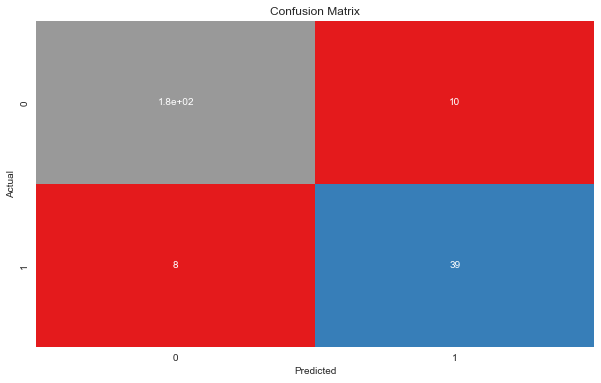

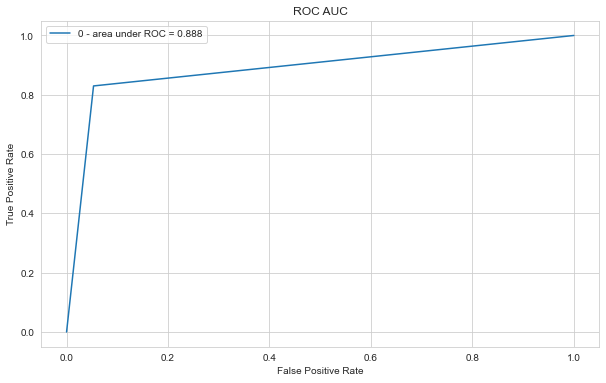

In [30]:
model_scoring = model_eval(rfc["model"], X_test_over_sampled, y_test_over_sampled)
scores["Random Forest | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                             "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

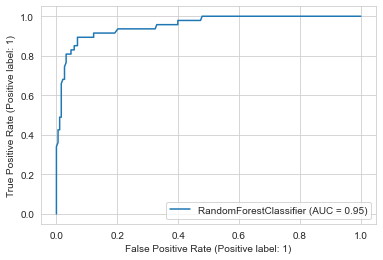

In [31]:
ROC_curve = plot_roc_curve(rfc["model"], X_test_over_sampled, y_test_over_sampled)
scores["Random Forest | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [136]:
# SVC

In [32]:
svc_params = {
    'clf__C': [0.1, 1],
    'clf__kernel': ['linear','rbf'],
    'clf__gamma':[1, 0.01]
}

svc = Modeler(SVC, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled, svc_params, scale=False, n_jobs=False)

Best Parameters for model: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


accuracy: 82.5531914893617 %
recall: 61.170212765957444 %
ROC: 61.170212765957444 %


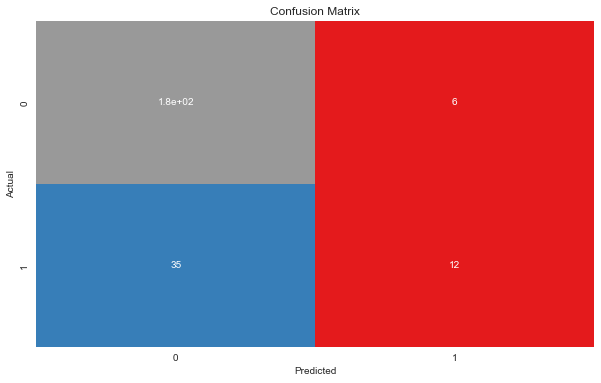

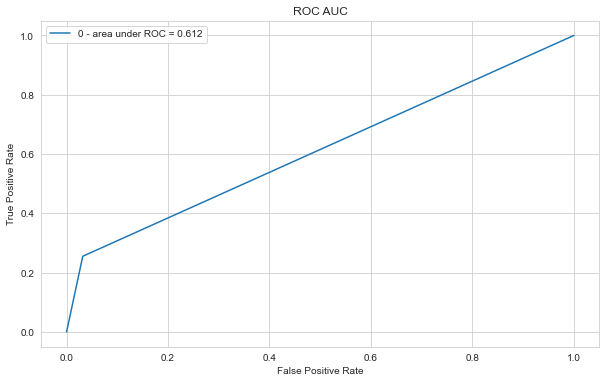

In [33]:
model_scoring = model_eval(svc["model"], X_test_over_sampled, y_test_over_sampled)
scores["Support-Vector Machine | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                             "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

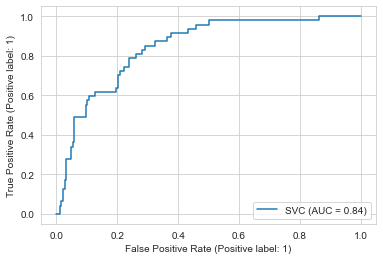

In [34]:
ROC_curve = plot_roc_curve(svc["model"], X_test_over_sampled, y_test_over_sampled)
scores["Support-Vector Machine | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [ ]:
# naive_bayes

In [35]:
naive_bayes = Modeler(GaussianNB, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled,params={}, scale=False, n_jobs=False)

Best Parameters for model: {}


accuracy: 73.61702127659574 %
recall: 73.93617021276594 %
ROC: 73.93617021276594 %


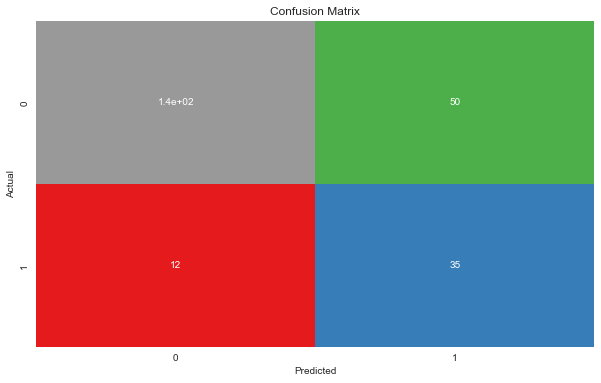

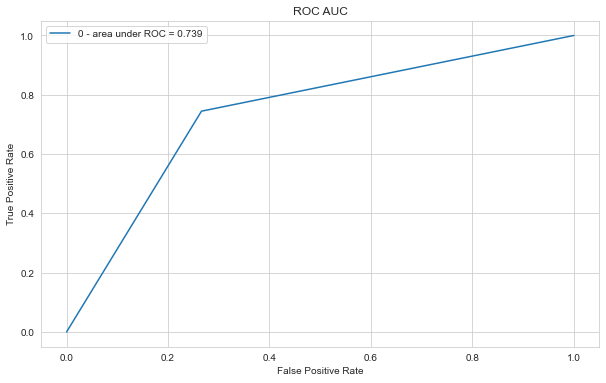

In [36]:
model_scoring = model_eval(naive_bayes["model"], X_test_over_sampled, y_test_over_sampled)
scores["Naive Bayes | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                              "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

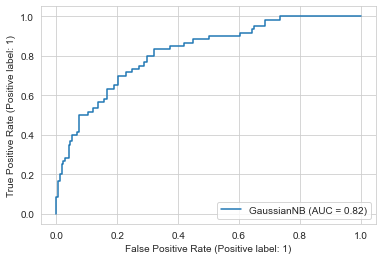

In [37]:
ROC_curve = plot_roc_curve(naive_bayes["model"], X_cv_over_sampled, y_cv_over_sampled)
scores["Naive Bayes | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [44]:
# Model Evaluation Comparision '%'

In [38]:
score_df = pd.DataFrame.from_dict(scores).T
score_df= score_df.sort_values('Accuracy', ascending=False)

In [39]:
score_df

,Accuracy,ROC,F1-Score,Recall-Score,AUC
XGBoost | Binary,94.89,92.02,92.02,92.02,96.07
Random Forest | Binary,92.34,88.83,88.22,88.83,95.46
AdaBoost Classifier | Binary,91.06,84.84,85.69,84.84,92.50
Support-Vector Machine | Binary,82.55,61.17,63.40,61.17,84.37
Naive Bayes | Binary,73.62,73.94,67.34,73.94,81.88


In [123]:
#feature importance using xgboost

In [152]:
model = XGBClassifier()
model.fit(X_train_over_sampled,y_train_over_sampled)

[19:10:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [153]:
print(model.feature_importances_)

[0.10278101 0.16066277 0.1322404  0.18246835 0.10620168 0.10247912
 0.04859877 0.06730934 0.04976001 0.04749858]


In [155]:
features = pd.DataFrame(model.feature_importances_)
features.describe()

,0
count,10.000000
mean,0.100000
std,0.047801
min,0.047499
25%,0.054147
50%,0.102630
75%,0.125731
max,0.182468


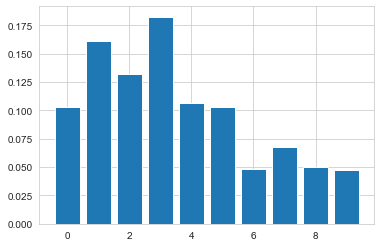

In [156]:
pyplot.bar(range(len(model.feature_importances_)),model.feature_importances_)
pyplot.show()

In [157]:
for feature in zip(X_train_over_sampled.columns,model.feature_importances_):
    print(feature)

('LOC_BLANK', 0.10278101)
('PERCENT_COMMENTS', 0.16066277)
('PARAMETER_COUNT', 0.1322404)
('CONDITION_COUNT', 0.18246835)
('CYCLOMATIC_DENSITY', 0.10620168)
('DESIGN_COMPLEXITY', 0.10247912)
('DESIGN_DENSITY', 0.048598774)
('ESSENTIAL_COMPLEXITY', 0.06730934)
('NUM_OPERATORS', 0.049760006)
('HALSTEAD_LEVEL', 0.047498576)


In [167]:
feature_list=[];
for feature in zip(X_train_over_sampled.columns,model.feature_importances_):
    if feature[1] > 0.054:
        print(feature)
        feature_list.append(feature)

('LOC_BLANK', 0.10278101)
('PERCENT_COMMENTS', 0.16066277)
('PARAMETER_COUNT', 0.1322404)
('CONDITION_COUNT', 0.18246835)
('CYCLOMATIC_DENSITY', 0.10620168)
('DESIGN_COMPLEXITY', 0.10247912)
('ESSENTIAL_COMPLEXITY', 0.06730934)


In [ ]:
# ranking features

In [173]:
feature_list.sort(key=lambda item: item[1])
feature_list.reverse()
features= pd.DataFrame(feature_list)
features

,0,1
0,CONDITION_COUNT,0.182468
1,PERCENT_COMMENTS,0.160663
2,PARAMETER_COUNT,0.132240
3,CYCLOMATIC_DENSITY,0.106202
4,LOC_BLANK,0.102781
5,DESIGN_COMPLEXITY,0.102479
6,ESSENTIAL_COMPLEXITY,0.067309


In [174]:
sfm=SelectFromModel(model,threshold=0.054)
X_important_train=sfm.fit(X_train_over_sampled,y_train_over_sampled)

[19:21:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [175]:
X_train_important_over_sampled = X_important_train.transform(X_train_over_sampled)

In [176]:
X_train_important_over_sampled.shape

(1092, 7)

In [ ]:
#

In [179]:
validation_size = 0.3
random_seed=7

from sklearn.model_selection import train_test_split
X_train_over_sampled, X_test_over_sampled, y_train_over_sampled, y_test_over_sampled = train_test_split(X_train_important_over_sampled, y_train_over_sampled, test_size=0.3,random_state=7)
X_cv_over_sampled, X_test_over_sampled, y_cv_over_sampled, y_test_over_sampled = train_test_split(X_test_over_sampled, y_test_over_sampled, test_size=0.5)
print("Train:", X_train_over_sampled.shape, y_train_over_sampled.shape,
      "Test:", X_test_over_sampled.shape, y_test_over_sampled.shape,
      "Cross Validation", X_cv_over_sampled.shape, y_cv_over_sampled.shape)

Train: (764, 7) (764,) Test: (164, 7) (164,) Cross Validation (164, 7) (164,)


In [127]:
#xgboost

In [181]:
xg_params = {
    'clf__max_depth': [8, 9],
    'clf__learning_rate': [0.1],
    'clf__n_estimators':[200],
    'clf__reg_alpha':[1.1],
    'clf__colsample_bytree':[0.8],
    'clf__subsample':[0.8, 0.9,],
}

xgboost = Modeler(XGBClassifier, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled, xg_params, scale=False, n_jobs=5)

[19:29:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:29:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Parameters for model: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'reg_alpha': 1.1, 'subsample': 0.8}


accuracy: 86.58536585365853 %
ROC: 82.71972760161736 %


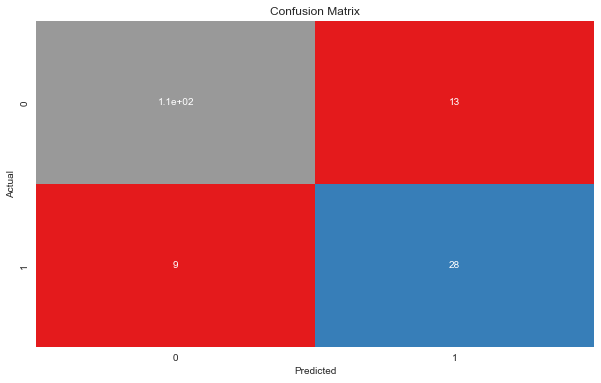

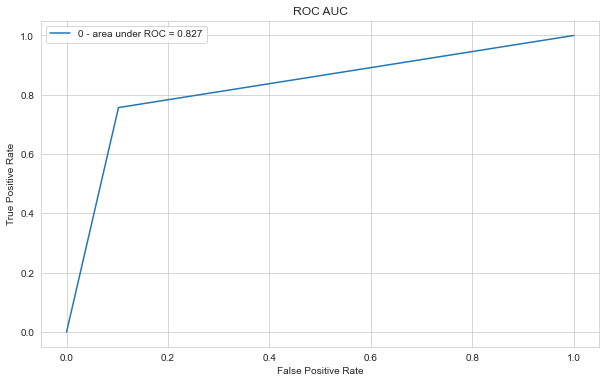

In [182]:
model_scoring = model_eval(xgboost["model"], X_test_over_sampled, y_test_over_sampled, multi=False)
scores["XGBoost | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                             "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                             "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100)}

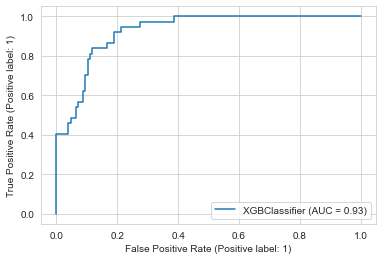

In [183]:
ROC_curve = plot_roc_curve(xgboost["model"], X_test_over_sampled, y_test_over_sampled)
scores["XGBoost | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)